In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

Exercise: ``A Soft Murmur'' is a web site that plays a mixture of natural noise sources, including rain, waves, wind, etc. At http://asoftmurmur.com/about/ you can find their list of recordings, most of which are at http://freesound.org.

Download a few of these files and compute the spectrum of each signal. Does the power spectrum look like white noise, pink noise, or Brownian noise? How does the spectrum vary over time?

In [2]:
import IPython.display as dp

url1= 'https://freesound.org/people/Soarer/sounds/13793/download/13793__soarer__north-sea.wav'
#url2= 'https://freesound.org/people/OroborosNZ/sounds/141251/download/141251__oroborosnz__thunder-storm.aiff'
url2= 'https://freesound.org/people/soundman9826/sounds/193335/download/193335__soundman9826__rain-and-thunder.mp3'
url3= 'https://freesound.org/people/inchadney/sounds/56611/download/56611__inchadney__morning-in-the-country.wav'
url4= 'https://freesound.org/people/martypinso/sounds/22604/download/22604__martypinso__dmp010037-crickets-texas.wav'

dp.Audio(url= url1)

In [46]:
def make_wave(self, duration=1, start=0, framerate=11025):
        signal = UncorrelatedUniformNoise()
        wave = signal.make_wave(duration, start, framerate)
        spectrum = wave.make_spectrum()

        spectrum.pink_filter(beta=self.beta)

        wave2 = spectrum.make_wave()
        wave2.unbias()
        wave2.normalize(self.amp)
        return wave2

I chose a recording of ocean waves. I selected a short segment:

In [47]:
segment = wave.segment(start= 10, duration=1.0)
segment.make_audio()

ValueError: zero-size array to reduction operation maximum which has no identity

In [4]:
segment.plot()
import matplotlib.pyplot as pl
pl.xlim([10.0,11])

NameError: name 'segment' is not defined

頻譜圖

In [5]:
spectrum = segment.make_spectrum()
spectrum.plot_power(high=1000)
thinkplot.config(xlabel='Frequency (Hz)')

NameError: name 'segment' is not defined

Amplitude drops off with frequency, so this might be red or pink noise. We can check by looking at the power spectrum on a log-log scale.

In [6]:
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

NameError: name 'spectrum' is not defined

This structure, with increasing and then decreasing amplitude, seems to be common in natural noise sources.

Above $f = 10^3$, it might be dropping off linearly, but we can't really tell.

To see how the spectrum changes over time, I'll select another segment:

 plot the two spectrums

In [ ]:
spectrum2 = segment2.make_spectrum()
spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

Here they are again, plotting power on a log-log scale.

In [7]:
spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude',
                 xscale='log', 
                 yscale='log')

NameError: name 'spectrum' is not defined

So the structure seems to be consistent over time.

We can also look at a spectrogram

In [8]:
segment.make_spectrogram(1024).plot(high=2000)

NameError: name 'segment' is not defined

In [9]:
segment2.make_spectrogram(1024).plot(high=2000)

NameError: name 'segment2' is not defined

Within this segment, the overall amplitude drops off, but the mixture of frequencies seems consistent.

Exercise: In a noise signal, the mixture of frequencies changes over time. In the long run, we expect the power at all frequencies to be equal, but in any sample, the power at each frequency is random.

In [10]:
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    
    fs = next(iter(spectrums)).fs  ## 這一行 我比較少用，值得研究一下....
    
    # make a Spectrum with the mean amplitudes
    spectrum = thinkdsp.Spectrum(hs, fs, wave.framerate)
    return spectrum

NameError: name 'wave' is not defined

bartlett_method makes a spectrogram and extracts spec_map, which maps from times to Spectrum objects. It computes the PSD for each spectrum, adds them up, and puts the results into a Spectrum object.

In [13]:
psd=  bartlett_method(segment)
psd2= bartlett_method(segment2)

psd.plot_power(color='red')
psd2.plot_power(color='blue')

thinkplot.config(xlabel='Frequency (Hz)', 
                 ylabel='Power', 
                 xscale='log', 
                 yscale='log')

NameError: name 'bartlett_method' is not defined

Now we can see the relationship between power and frequency more clearly. It is not a simple linear relationship, but it is consistent across different segments, even in details like the notches near 5000 Hz, 6000 Hz, and above 10,000 Hz.

Exercise: At http://www.coindesk.com you can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?

In [12]:
ryCsv=  'BTC_USD_2013-10-01_2020-04-30-CoinDesk.csv'

In [14]:
df = pd.read_csv(ryCsv) #, nrows=1625, parse_dates=[0])
df.head()

FileNotFoundError: [Errno 2] File b'BTC_USD_2013-10-01_2020-04-30-CoinDesk.csv' does not exist: b'BTC_USD_2013-10-01_2020-04-30-CoinDesk.csv'

In [15]:
df.columns

NameError: name 'df' is not defined

In [16]:
ys = df['Closing Price (USD)'].values
ts = np.arange(len(ys)) #df['Date'].values

NameError: name 'df' is not defined

In [17]:
wave = thinkdsp.Wave(ys, ts, framerate=1)
wave.plot()
thinkplot.config(ylabel='Closing Price (USD)')
thinkplot.config(xlabel='days') #'Time (days)')

NameError: name 'ys' is not defined

In [18]:
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (1/days)',
                 xscale='log', yscale='log')

NameError: name 'spectrum' is not defined

The slope is -1.8, which is similar to red noise (which should have a slope of -2)

In [19]:
spectrum.estimate_slope()

NameError: name 'spectrum' is not defined

Exercise: A Geiger counter is a device that detects radiation. When an ionizing particle strikes the detector, it outputs a surge of current. The total output at a point in time can be modeled as uncorrelated Poisson (UP) noise, where each sample is a random quantity from a Poisson distribution, which corresponds to the number of particles detected during an interval.

Write a class called UncorrelatedPoissonNoise that inherits from thinkdsp._Noise and provides evaluate. It should use np.random.poisson to generate random values from a Poisson distribution. The parameter of this function, lam, is the average number of particles during each interval. You can use the attribute amp to specify lam. For example, if the framerate is 10 kHz and amp is 0.001, we expect about 10 “clicks” per second.

Generate about a second of UP noise and listen to it. For low values of amp, like 0.001, it should sound like a Geiger counter. For higher values it should sound like white noise. Compute and plot the power spectrum to see whether it looks like white noise.

In [20]:
class UncorrelatedPoissonNoise(thinkdsp._Noise):
    """Represents uncorrelated Poisson noise."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        ys = np.random.poisson(lam= self.amp, size= len(ts))
        return ys

In [21]:
#np.random.poisson??
import numpy as np
import scipy.stats as st

#np.random.seed(1)
X1= np.random.poisson(lam= 10,size= 100)

#np.random.seed(0)
X2= st.poisson.rvs(mu= 10, size= 100)



X1.mean(), X1.var(), \
X2.mean(), X2.var(), \
X1, X2

(10.24,
 10.2424,
 9.65,
 11.387499999999998,
 array([ 6, 12,  3,  9, 16,  8, 13,  7,  8,  9, 11,  3, 15, 12,  7,  9,  8,
         7, 12, 14, 10, 12,  7, 13, 11,  8, 12,  8,  9, 12,  9, 10, 14, 13,
        11,  6, 10,  8, 14,  7,  9,  9, 13,  9, 12,  8, 11,  9,  6, 10, 16,
        12, 17, 10,  7, 13, 10,  7,  6, 10, 11,  8,  5,  6,  6, 10, 14, 14,
        18,  7, 10, 11,  6, 13, 13,  8, 16, 12, 12, 14, 11,  7, 14,  9, 12,
        14, 14, 12,  8, 15, 10, 10, 13, 16, 11,  7,  3,  7,  7, 13]),
 array([12,  3,  9, 11, 12, 18, 12,  5,  9, 11,  8,  5, 13,  9,  9, 10,  6,
        22, 11, 10, 12, 13,  7,  6, 14, 10,  8, 15,  6,  6, 12, 13,  5, 13,
        16,  9, 10,  9, 12,  7,  7,  8,  9,  9,  6, 13, 10,  9, 12,  8, 12,
         6, 11, 11,  7,  5,  7, 14,  9, 11, 10, 12,  8,  5, 10,  6,  9,  7,
        11, 13, 10, 13, 11, 10,  7, 12,  9, 10, 13, 16, 11,  8, 10, 13, 11,
        13,  4,  4, 14, 15, 10,  7, 11,  8,  4,  2,  6,  4,  9,  7]))

Here's what it sounds like at low levels of "radiation".

In [22]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

To check that things worked, we compare the expected number of particles and the actual number:

In [23]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

10.0 13


Here's what the wave looks like:

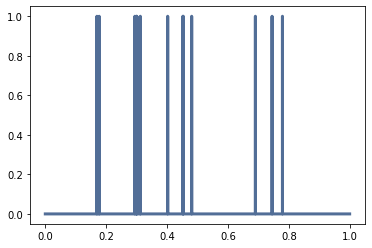

In [24]:
wave.plot()

And here's its power spectrum on a log-log scale.

No handles with labels found to put in legend.


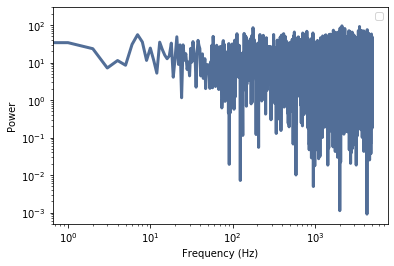

In [25]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Power',
                 xscale='log', 
                 yscale='log')

Looks like white noise, and the slope is close to 0.

In [26]:
spectrum.estimate_slope().slope

-0.0287979638611594

With a higher arrival rate, it sounds more like white noise:

In [27]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

It looks more like a signal:

(0, 0.1)

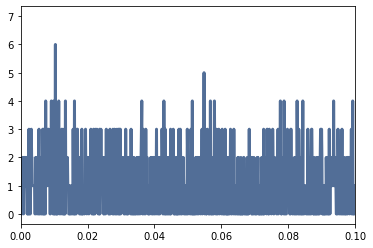

In [28]:
import matplotlib.pylab as pl

wave.plot()

pl.xlim([0,.1])

And the spectrum converges on Gaussian noise

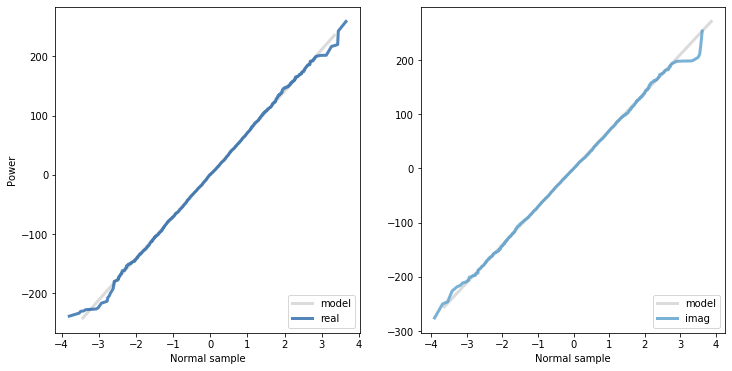

In [29]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0

thinkplot.preplot(2, cols=2)
thinkstats2.NormalProbabilityPlot(spectrum.real, label='real')
thinkplot.config(xlabel='Normal sample',
                 ylabel='Power',
                 legend=True,
                 loc='lower right')

thinkplot.subplot(2)
thinkstats2.NormalProbabilityPlot(spectrum.imag, label='imag')
thinkplot.config(xlabel='Normal sample',
                     loc='lower right')

Exercise: The algorithm in this chapter for generating pink noise is conceptually simple but computationally expensive. There are more efficient alternatives, like the Voss-McCartney algorithm. Research this method, implement it, compute the spectrum of the result, and confirm that it has the desired relationship between power and frequency.

Solution: The fundamental idea of this algorithm is to add up several sequences of random numbers that get updates at different sampling rates. The first source should get updated at every time step; the second source every other time step, the third source ever fourth step, and so on.

In [30]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.25135096, 0.04306711, 0.92469502, 0.14843353, 0.28864324],
       [0.6507769 ,        nan,        nan,        nan,        nan],
       [0.79849858,        nan,        nan,        nan,        nan],
       [0.34248108,        nan,        nan,        nan,        nan],
       [0.8203776 ,        nan,        nan,        nan,        nan],
       [0.97049432,        nan,        nan,        nan,        nan]])

The next step is to choose the locations where the random sources change. If the number of rows is $n$, the number of changes in the first column is $n$, the number in the second column is $n/2$ on average, the number in the third column is $n/4$ on average, etc.

So the total number of changes in the matrix is $2n$ on average; since $n$ of those are in the first column, the other $n$ are in the rest of the matrix.

To place the remaining $n$ changes, we generate random columns from a geometric distribution with $p=0.5$. If we generate a value out of bounds, we set it to 0 (so the first column gets the extras).

In [31]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([1, 3, 4, 2, 1, 3, 2, 1, 1, 2, 1, 3, 4, 1, 1, 1, 1, 1, 2, 1, 1, 3,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 1,
       4, 1, 1, 1, 4, 1, 1, 2, 1, 2, 4, 1, 2, 1, 1, 0, 4, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 3, 2, 0, 3, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1,
       1, 2, 1, 2, 3, 4, 2, 2, 2, 1, 4, 1])

Within each column, we choose a random row from a uniform distribution. Ideally we would choose without replacement, but it is faster and easier to choose with replacement, and I doubt it matters.

In [32]:
rows = np.random.randint(nrows, size=n)
rows

array([35, 97, 20, 83,  8, 44, 16, 20, 80, 50, 57, 32, 24, 39, 57, 20, 36,
       74, 75, 56, 42, 84, 72, 43, 22, 61, 38,  9, 84, 31, 23, 27, 77, 55,
       42, 21, 72, 51, 22, 30, 54, 92, 94, 37,  2, 97, 73, 88, 65, 50, 88,
       97, 96, 76, 67, 81, 50, 19, 38, 66, 96, 13,  5, 94, 41, 32, 18, 79,
       41, 53, 55, 52, 86, 21, 17, 69, 84, 55, 80, 70, 21, 39, 57, 85, 54,
       87, 75, 62, 97, 58, 25,  3, 52, 37, 78, 87, 57, 61,  0, 11])

Now we can put random values at rach of the change points.

In [33]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.25135096, 0.04306711, 0.92469502, 0.14843353, 0.54452705],
       [0.6507769 ,        nan,        nan,        nan,        nan],
       [0.79849858,        nan,        nan,        nan, 0.05243338],
       [0.34248108,        nan, 0.23735108,        nan,        nan],
       [0.8203776 ,        nan,        nan,        nan,        nan],
       [0.97049432, 0.66674427,        nan,        nan,        nan]])

Next we want to do a zero-order hold to fill in the NaNs. NumPy doesn't do that, but Pandas does. So I'll create a DataFrame:

In [34]:
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.251351,0.043067,0.924695,0.148434,0.544527
1,0.650777,NaN,NaN,NaN,NaN
2,0.798499,NaN,NaN,NaN,0.052433
3,0.342481,NaN,0.237351,NaN,NaN
4,0.820378,NaN,NaN,NaN,NaN


And then use fillna along the columns.

In [35]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

,0,1,2,3,4
0,0.251351,0.043067,0.924695,0.148434,0.544527
1,0.650777,0.043067,0.924695,0.148434,0.544527
2,0.798499,0.043067,0.924695,0.148434,0.052433
3,0.342481,0.043067,0.237351,0.148434,0.052433
4,0.820378,0.043067,0.237351,0.148434,0.052433


finally we add up the rows.

In [36]:
total = filled.sum(axis=1)
total.head()

0    1.912074
1    2.311500
2    1.967128
3    0.823766
4    1.301663
dtype: float64

If we put the results into a Wave, here's what it looks like:

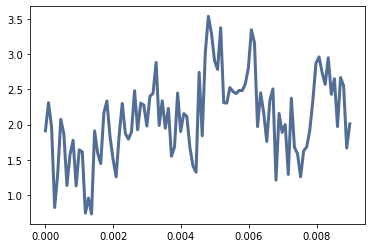

In [37]:
wave = thinkdsp.Wave(total.values)
wave.plot()

Here's the whole process in a function:

In [ ]:
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [39]:
ys = voss(11025)
ys

array([9.44529322, 8.58134144, 8.27072436, ..., 9.31314189, 9.11978566,
       8.74828608])

make them into a Wave:

In [40]:
wave = thinkdsp.Wave(ys)
wave.unbias()
wave.normalize()

看起來像

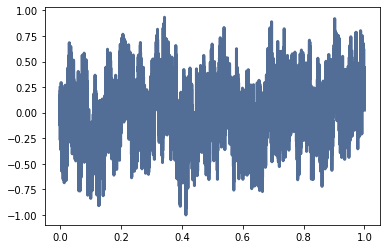

In [41]:
wave.plot()

As expected, it is more random-walk-like than white noise, but more random looking than red noise.

Here's what it sounds like:

In [42]:
wave.make_audio()

 the power spectrum